# Impact of Foreign Players on the success of a Football Team



Major professional clubs in Premier League choose their players not only from the local pool anymore but also from the global one (Storey, 2011). As a result of this mindset change, diversity within teams have been increasing. 

In the context of this, I decided to conduct data analysis to see whether there is a trend between team success and the number/percentage of foreign players in a team. To start investigating this, I have chosen the most winning team in the Premier League history, Manchester United (Premier League, 2020), and collected the past ten seasons of their data containing the team statistics and the player nationalities per season. The data were downloaded as multiple .csv files from an extensive football website, FBREF(https://bit.ly/3nJYjq9), by selecting all ten seasons separately. (According to the website, this dataset is open and allowed to be used as long as the website name is cited.)

In this notebook, 'Foreign' players refer to those who are not from England.

There might be some weaknesses or caveats in my approach, however, I would like to mention them at the relevant step in due time.

## 1. Libraries, Functions and Constants

I have collected all the libraries necessary for my work under this section. The reasons for why I have chosen these libraries are listed below.

- **Pandas**: While I was studying for Topic 4 on the VLE, I had a chance to take a deep dive into the capabilities of Pandas and noticed the importance of it when it comes to the data analysis. Especially its power on working with tabular data took my interest since I have a background in working with databases by using SQL.

- **Seaborn**: I was initially planning to use matplotlib only to visualize my data, however, when I was searching for the data visualization tools, I came across with seaborn. Because it still uses matplotlib as a base, works well with pandas, and provides user-friendly and informative statistical graphics(Seaborn,2020), I decided to apply it to my work.

- **Glob**: Since I have multiple files having a similar pattern both on the file names and structure of data stored in them, the glob library leveraged my work. 

- **Os**: This library helped me fetch a particular string from a file name so I did not need to use hardcoded values multiple times.(It will be explained in detail at a stage where it has been used.)

In [1]:
import pandas as pd
import seaborn as sns
import glob
import os

Instead of writing the same code over and over again in this notebook, I have created functions where necessary. 
All these functions are listed below together with in-text comments to give details for the logic applied.

In [2]:
#This is the core function which calls 2 other functions needed for cleaning data.
def main_clean_func (df_func, flag):
    
    df_func = tweak_columns (df_func, flag)
    df_func = tweak_data (df_func, flag)  
    
    return df_func
     
    
    
    
#This function is responsible for changing column names of an input dataframe into more understandable ones
#and returning a clean dataframe after filtering the columns not needed.
def tweak_columns (df_func, flag):
    
    if flag == '1': #applicable for data in which the player details exist.
        df_func= df_func.rename(columns={'Gls':'Goals', 'Ast':'Assists', 'MP': 'Matches_Played'}
                               )
        
        df_func = df_func[['Player', 'Nation','Season',
                           'Age','Goals', 'Assists' , 'Matches_Played']]
        
    else : #applicable for data in which the team details exist.
        df_func= df_func.rename(columns={'Rk': 'Ranking', 'MP': 'Matches_Played',
                                         'W':'Wins', 'D':'Draws', 'L':'Loses', 
                                         'Top Team Scorer': 'Top_Scorer'}
                               )
        
        df_func = df_func[['Ranking', 'Squad', 'Season',
                           'Matches_Played', 'Wins', 'Draws', 
                           'Loses', 'Top_Scorer']]   
        
    return df_func




#This function is responsible for cleaning data stored under certain columns in a dataframe.
def tweak_data(df_func, flag):
    
    if flag == '1': #applicable for data in which the player details exist.
        df_func = (df_func.assign
                    (Player = (df_func.Player.str.split("\\")
                                           .map(lambda x: x[0])
                                           .str.strip()
                                               
                               )                 
                    
                    ,Nation=(df_func.Nation.str.split(" ")
                                    .map(lambda y: y[1])
                                    .str.strip()
                              )  
                  ) 
                  )
    else : #applicable for data in which the team details exist.
        
        df_func_top_scorer_splitted = df_func.Top_Scorer.str.split("-")
        
        df_func = (df_func.assign
                    (Top_Scorer = (df_func_top_scorer_splitted.map(lambda x: x[0])
                                                               .str.strip()
                                                               
                                  )
                   
                    ,Top_Scorer_Score = df_func_top_scorer_splitted.map(lambda x: x[1])
                   )
                  )
        
    
    
    #dropping duplicate rows from the input data if any exist.
    df_func = df_func.drop_duplicates()
    
    return df_func



#This function is responsible for calculating the percentage of a value stored in a certain column 
#for a given dataframe and returning a modified dataframe having a new column in which such percentage value stored.
def percentage_data(df_func, col_value, tot_value, name_of_new_col):
    
    df_func[name_of_new_col] = round(((col_value*100)/tot_value), 2)
    
    return df_func   



Constants are quite handy in case any value needs to be used multiple times in a project without changing. 
By using the below constant value, I prevented myself from using a hardcoded value in my notebook so my code became cleaner.

In [3]:
#Constant values listed here..
ENGLAND = 'ENG'

## 2. Preparing data for analysis (Data Wrangling)

In this notebook, I have used 2 different types of dataset per Premier League season (Because 10 seasons selected, 10 files used for each dataset). Details about these 2 types have been explained below.

- **Player Statistics:** This dataset contains the player information of Manchester United such as nationality, age,     number of goals they scored, etc. The file names of the relevant files stored under the 'data' folder start with '*manchesterunited_*'
- **Team Statistics:** This dataset contains the overall team information such as team name, ranking in a season,   top scorer of the team, team score, etc. The file names of the relevant files stored under the 'data' folder start with '*Stats__*'

For each type, the structure of the files per season is exactly the same. The difference is obviously on the data level since each file per type represents a different season. In the following cells, I have used the head() function to take a look at how the data in those 2 different types of dataset look like. 

### 2.1. Player Statistics

Firstly, I am going to check how the files storing the player statistics data look like. I have chosen the season '2019-2020'

In [4]:
df_mUtd_20192020= pd.read_csv('data/manchesterunited_2019_2020.csv') #mUtd refers to Manchester United

df_mUtd_20192020.head()


,Player,Nation,Pos,Age,MP,Starts,Min,Gls,Ast,PK,...,G+A-PK,xG,npxG,xA,xG.1,xA.1,xG+xA,npxG.1,npxG+xA,Matches
0,David de Gea\David-de-Gea,es ESP,GK,28,38,38,3420.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,Matches
1,Harry Maguire\Harry-Maguire,eng ENG,DF,26,38,38,3420.0,1.0,1.0,0.0,...,0.05,2.0,2.0,0.6,0.05,0.01,0.07,0.05,0.07,Matches
2,Victor Lindelöf\Victor-Lindelof,se SWE,DF,25,35,35,3092.0,1.0,0.0,0.0,...,0.03,0.4,0.4,0.3,0.01,0.01,0.02,0.01,0.02,Matches
3,Aaron Wan-Bissaka\Aaron-Wan-Bissaka,eng ENG,DF,21,35,34,3070.0,0.0,4.0,0.0,...,0.12,0.9,0.9,2.9,0.03,0.08,0.11,0.03,0.11,Matches
4,Marcus Rashford\Marcus-Rashford,eng ENG,FW,21,31,31,2643.0,17.0,7.0,6.0,...,0.61,17.3,11.2,4.6,0.59,0.16,0.74,0.38,0.54,Matches


Not all the columns are visible, therefore, I have changed the dataframe settings slightly.

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
df_mUtd_20192020= pd.read_csv('data/manchesterunited_2019_2020.csv') #mUtd refers to Manchester United

df_mUtd_20192020.head()

,Player,Nation,Pos,Age,MP,Starts,Min,Gls,Ast,PK,PKatt,CrdY,CrdR,Gls.1,Ast.1,G+A,G-PK,G+A-PK,xG,npxG,xA,xG.1,xA.1,xG+xA,npxG.1,npxG+xA,Matches
0,David de Gea\David-de-Gea,es ESP,GK,28,38,38,3420.0,0.0,0.0,0.0,0.0,2.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,Matches
1,Harry Maguire\Harry-Maguire,eng ENG,DF,26,38,38,3420.0,1.0,1.0,0.0,0.0,6.0,0.0,0.03,0.03,0.05,0.03,0.05,2.0,2.0,0.6,0.05,0.01,0.07,0.05,0.07,Matches
2,Victor Lindelöf\Victor-Lindelof,se SWE,DF,25,35,35,3092.0,1.0,0.0,0.0,0.0,6.0,0.0,0.03,0.00,0.03,0.03,0.03,0.4,0.4,0.3,0.01,0.01,0.02,0.01,0.02,Matches
3,Aaron Wan-Bissaka\Aaron-Wan-Bissaka,eng ENG,DF,21,35,34,3070.0,0.0,4.0,0.0,0.0,8.0,0.0,0.00,0.12,0.12,0.00,0.12,0.9,0.9,2.9,0.03,0.08,0.11,0.03,0.11,Matches
4,Marcus Rashford\Marcus-Rashford,eng ENG,FW,21,31,31,2643.0,17.0,7.0,6.0,8.0,3.0,0.0,0.58,0.24,0.82,0.37,0.61,17.3,11.2,4.6,0.59,0.16,0.74,0.38,0.54,Matches


Based on the data above:
    
- Not all the column names are needed for my analysis so I have selected only *'MP'(Matches Played),'Gls'(Goals), and 'Ast'(Assists)*.
- There are player names stored under the *Player* column containing the player names 2 times which are delimited with a delimiter ('\\'). By using Python's *split()* function, I have created a list having the values in this data separately. After that, the first element in this list has been mapped to the entire column by using Pandas' *map()* function so the player name has been shown only once and correctly. Additionally, Python's *strip()* function has been used to prevent data from having leading or trailing spaces.
- The same sort of action mentioned in the previous bullet point needed to be applied also to the *Nation* column which stores the nationality of players. The only difference is the type of delimiter, which is 'empty space' in this case.
- Some of the column names needed to be renamed with some understandable ones, therefore, Pandas' *rename()* function has been used.
- To be sure that none of the files have duplicate records, Pandas' *drop_duplicates()* function has been used.


I had to take these actions for 10 files seperately, which do have the same data structure and same file name pattern that starts with *'manchesterunited_'*.  Instead of doing it one by one; 

- I have decided to use Python's *glob* library which helped me to read 10 files at the same time. 
- I have created some functions which helped me to clean data for each file properly. By doing this, I did not have any code repetitions in the notebook in the end. (Functions coded under Section 1)
- Because the skeleton of the requirements for my analysis on both player statistics files and team statistics files (which will be detailed under Section 2.2) are similar, I have decided to implement the needed functions only once and separate the specific steps for each file type in such functions with a *flag* input. '1' is used for the steps needed for this section.

In the coming cell, coding steps can be found..

In [7]:
csv_files = glob.glob('data/manchesterunited*csv')

lst_of_df_seasons= []

#"For" loop is used to read all the files in the "csv_files" list automatically, where team statistics data stored.
for file in csv_files:
 
    df_mUtd = pd.read_csv(file)
    
    file_name_divided = os.path.basename(file).split("_")
    
    #Adding a new column, namely Season, by fetching that information from the file name itself.
    df_mUtd['Season'] = (file_name_divided[1]  
                         + '-' 
                         + file_name_divided[2].split(".")[0]
                        )
    #Appending the dataframe to the main list which is initially defined empty.
    lst_of_df_seasons.append(df_mUtd)

    
#This part is added for the exception handling purposes. If the files have not been added to the main list at all,
#the entire process should stop here.
if not len(lst_of_df_seasons):
    raise Exception("Files have not been read successfully. Please ensure your files are in place.")

    
#All the files which were previously added to the "lst_of_df_seasons" is being concatenated here so I will have only 
#1 data frame in the end having data for all the seasons.
df_all_seasons_mUtd_player = pd.concat(lst_of_df_seasons, ignore_index=True)

#Main function is called here to start the data wrangling process. 
df_all_seasons_mUtd_player_clean = main_clean_func(df_all_seasons_mUtd_player ,'1')


In [8]:
df_all_seasons_mUtd_player_clean.head()

,Player,Nation,Season,Age,Goals,Assists,Matches_Played
0,Nemanja Vidić,SRB,2010-2011,28,5.0,1.0,35
1,Patrice Evra,FRA,2010-2011,29,1.0,0.0,35
2,Edwin van der Sar,NED,2010-2011,39,0.0,0.0,33
3,Nani,POR,2010-2011,23,9.0,14.0,33
4,Wayne Rooney,ENG,2010-2011,24,11.0,11.0,28


As a final step of the data wrangling process for this section, I have checked if there are any null records in the data frame, which might impact my work. 'Matches_Played' column was taken into consideration because the players who have not participated any match before are not useful for the analysis. 

In [9]:
df_all_seasons_mUtd_player_clean[df_all_seasons_mUtd_player_clean.isnull().any(axis=1)]

,Player,Nation,Season,Age,Goals,Assists,Matches_Played
148,Ben Amos,ENG,2014-2015,24,NaN,NaN,0
149,Reece James,ENG,2014-2015,20,NaN,NaN,0
150,Shinji Kagawa,JPN,2014-2015,25,NaN,NaN,0
151,Will Keane,ENG,2014-2015,21,NaN,NaN,0
152,Anders Lindegaard,DEN,2014-2015,30,NaN,NaN,0
153,Marnick Vermijl,BEL,2014-2015,22,NaN,NaN,0
187,Sean Goss,ENG,2015-2016,19,NaN,NaN,0
188,Sam Johnstone,ENG,2015-2016,22,NaN,NaN,0
189,Joe Riley,ENG,2015-2016,18,NaN,NaN,0
190,Joe Rothwell,ENG,2015-2016,20,NaN,NaN,0


This output shows that all null records belong to the players who have not played any single match at all. Therefore, by using Pandas' dropna() function, I have removed them from the data frame.

In [10]:
df_all_seasons_mUtd_player_clean =  df_all_seasons_mUtd_player_clean.dropna()

Because some null records dropped, the index of the data frame was not clean anymore. Pandas' reset_index() function
is a useful function in this sort of scenerious to make the numeric values in the index 

In [11]:
df_all_seasons_mUtd_player_clean = df_all_seasons_mUtd_player_clean.reset_index(drop='true')

df_all_seasons_mUtd_player_clean.head()

,Player,Nation,Season,Age,Goals,Assists,Matches_Played
0,Nemanja Vidić,SRB,2010-2011,28,5.0,1.0,35
1,Patrice Evra,FRA,2010-2011,29,1.0,0.0,35
2,Edwin van der Sar,NED,2010-2011,39,0.0,0.0,33
3,Nani,POR,2010-2011,23,9.0,14.0,33
4,Wayne Rooney,ENG,2010-2011,24,11.0,11.0,28


### 2.2. Team Statistics

In this section, the files containing the team statistics data have been cleaned and got ready for further actions. The activities completed in this section are similar to those handled in Section 2.1. 

Again, I have chosen the season '2019-2020' to check the data first.

In [12]:
df_stats_20192020 = pd.read_csv('data/Stats__2019_2020.csv')

df_stats_20192020.head()

,Rk,Squad,MP,W,D,L,GF,GA,GDiff,Pts,xG,xGA,xGDiff,xGDiff/90,Attendance,Top Team Scorer,Goalkeeper,Notes
0,1,Liverpool,38,32,3,3,85,33,52,99,71.5,40.0,31.5,0.83,41955,Mohamed Salah - 19,Alisson,→ UEFA Champions League via league finish
1,2,Manchester City,38,26,3,9,102,35,67,81,93.0,34.7,58.3,1.53,37097,Raheem Sterling - 20,Ederson,→ UEFA Champions League via league finish
2,3,Manchester Utd,38,18,12,8,66,36,30,66,59.4,37.4,22.0,0.58,57415,Marcus Rashford Anthony Martial - 17,David de Gea,→ UEFA Champions League via league finish
3,4,Chelsea,38,20,6,12,69,54,15,66,66.6,37.9,28.6,0.75,32023,Tammy Abraham - 15,Kepa Arrizabalaga,→ UEFA Champions League via league finish
4,5,Leicester City,38,18,8,12,67,41,26,62,61.6,44.5,17.1,0.45,25312,Jamie Vardy - 23,Kasper Schmeichel,→ UEFA Europa League via league finish


Based on the data above: 

- Not all the column names needed for my analysis so I have selected only *'Rk'(Ranking), 'Squad', 'MP'(Matches_Played), 'W'(Number of the matches won), 'D'(Number of matches drawn), 'L'(Number of the matches lost), and 'Top Team Scorer'*
- Some of the column names are not understandable, therefore, Pandas' *rename()* function was used to change them.
- 'Top Team Scorer' column contains not only the player name but also the number of the goals scored by such player and delimited with a separator('-'). By using Python's *split()* function, I have created a list storing these values in it separately. After that, the first element(Name of the player) in this list was mapped to the *'Top Team Scorer'* column by using the *map()* function so that the player name has been shown correctly in the end. Regarding the second element(Score) in the same list, a new column namely *'Top_Team_Scorer'* has been created and the second element assigned in it.  Additionally, Python's *strip()* function was used to prevent any data from having leading or trailing spaces.
- To be sure that none of the files have duplicate records on the record level, Pandas' *drop_duplicates()* function was used.

I had to take these actions for 10 files seperately again, which do have the same data structure and same file name pattern that starts with *'Stats__*.  
Instead of doing it one by one;

- Again, I used Python's *glob* library which helped me to read 10 files at the same time. 
- flag='2' is used for this section while calling the "main_clean_func". The rationale of having this flag input value has been clearly explained in Section 2.1 already.

In the coming cell, coding steps can be found..

In [13]:
csv_files = glob.glob('data/Stats*csv')

lst_of_df_stats = []

#"For" loop is used to read all the files in the "csv_files" list automatically, where team statistics data stored.
#In fact, I used the same sort of "for" loop in Section 2.1., but still I did not want to create a function covering
#this functionality because the pattern of the file names for Team Statistics is different than the Player Statistics
#and this might be a case in real life where I have so many files and changing the files names might be a time
#consuming activity..
for file in csv_files:
    
    df_stats = pd.read_csv(file)
    
    #Adding a new column, namely "Season", by fetching that information from the file name.
    df_stats['Season'] = (os.path.basename(file)
                                 .split("__")[1].split('.')[0]
                                 .replace("_", "-") 
                         )
    
    #Appending the dataframe to the main list which is initially defined empty above.                      )
    lst_of_df_stats.append(df_stats)
  
     
#This part is added for the exception handling purposes. If the files have not added to the main list at all,
#the entire process should stop.   
if not len(lst_of_df_stats):
    raise Exception("Files have not been read successfully. Please ensure your files are in place.")
    

#All the files which were previously added to the "lst_of_df_stats" is being concatenated here so I will have only 
#1 data frame in the end having data for all the seasons.
df_all_stats = pd.concat(lst_of_df_stats, ignore_index=True)


#Because stats files contain not only Manchester United, other teams are being filtered here. 
#The filtered content copied to another dataframe to keep the original content as-is.                         
df_all_mUtd_stats = (df_all_stats.loc[df_all_stats.Squad =='Manchester Utd']
                                 .reset_index(drop=True)
                    )

                          
#Main function is called here to start the data wrangling process. 
df_all_seasons_mUtd_stats_clean = main_clean_func(df_all_mUtd_stats,'2')


In [14]:
df_all_seasons_mUtd_stats_clean.head()

,Ranking,Squad,Season,Matches_Played,Wins,Draws,Loses,Top_Scorer,Top_Scorer_Score
0,1,Manchester Utd,2010-2011,38,23,11,4,Dimitar Berbatov,20
1,2,Manchester Utd,2011-2012,38,28,5,5,Wayne Rooney,27
2,1,Manchester Utd,2012-2013,38,28,5,5,Robin van Persie,26
3,7,Manchester Utd,2013-2014,38,19,7,12,Wayne Rooney,17
4,4,Manchester Utd,2014-2015,38,20,10,8,Wayne Rooney,12


As a final step for this section as well, null record check completed below and nothing observed..

In [15]:
df_all_seasons_mUtd_stats_clean[df_all_seasons_mUtd_stats_clean.isnull().any(axis=1)]

,Ranking,Squad,Season,Matches_Played,Wins,Draws,Loses,Top_Scorer,Top_Scorer_Score


## 3. Trend Discovery

Data for team statistics and player statistics have been cleaned in the previous steps and prepared for the investigation. Under this section, I have mostly used the power of descriptive statistics together with seaborn plots which helped me visualize the correlations between attributes easily.

### 3.1. Correlation Between the Team ranking / Team score and the Percentage of Foreign Players

At the end of a season, the team score and ranking are 2 major indicators of success for a team, therefore, I have decided to use the percentage of the foreign players in Manchester United as a key-value to compare with the team score and ranking separately to see if there exist any correlation between each other. 


First of all, a new data frame created, which stores the statistical data by taking all players into consideration for 10 seasons.. This has leveraged my work in terms of calculating the correlations between attributes and drawing better visual plots by using one single dataframe.

In [16]:
#A new data frame created.
df_players_with_percentage= (df_all_seasons_mUtd_player_clean[~(df_all_seasons_mUtd_player_clean.Nation== ENGLAND)]
                             .groupby(['Season'])
                             .count() 
                            )

#A new column created to store the number of the players per season in the team.
df_players_with_percentage ['Total_Num_Players'] = (df_all_seasons_mUtd_player_clean.groupby('Season')
                                                                                    .count()['Player']
                                                   )

#Since the English players already filtered out, the name of the 'Player' columns changed into more
#understandable one.
df_players_with_percentage = (df_players_with_percentage[[ 'Player', 'Total_Num_Players']]
                                .rename(columns={'Player': 'Num_Foreign_Players'})
                             )


#At this step, the percentage of the foreign players in the team per season calculated and the value assigned
#to the new column, namely 'Percentage_of_Foreign_Players'
df_players_with_percentage = percentage_data(df_players_with_percentage
                                            ,df_players_with_percentage.Num_Foreign_Players
                                            ,df_players_with_percentage.Total_Num_Players
                                            ,'Percentage_of_Foreign_Players')


df_players_with_percentage

,Num_Foreign_Players,Total_Num_Players,Percentage_of_Foreign_Players
Season,,,
2010-2011,20,29,68.97
2011-2012,18,31,58.06
2012-2013,15,25,60.00
2013-2014,21,30,70.00
2014-2015,20,33,60.61
2015-2016,20,33,60.61
2016-2017,19,31,61.29
2017-2018,19,27,70.37
2018-2019,19,28,67.86


In the coming cell, I have fetched the 'team score' and 'team ranking per season' data from the main team statistics data frame (df_all_seasons_mUtd_stats_clean) and assign them to the new data frame (df_players_with_percentage) which I have created in the previous step.

In [17]:
#In order to merge my new dataframe (*df_players_with_percentage*) with the team statistics 
#dataframe (df_all_seasons_mUtd_stats_clean), a new copy of *df_players_with_percentage* created here by first 
#setting the index of *df_all_seasons_mUtd_stats_clean* to 'Season'.
df_all_seasons_mUtd_stats_clean_index_changed = df_all_seasons_mUtd_stats_clean.set_index('Season')

#now the merge is happening here..
df_players_with_percentage = pd.merge(df_players_with_percentage
                                      ,df_all_seasons_mUtd_stats_clean_index_changed
                                      ,left_index=True
                                      ,right_index=True)


#After the merge, only needed columns selected here.. The column name for 'Wins' changed to
#'Team_Score' to make it easy to understand..
df_players_with_percentage = ( df_players_with_percentage [['Num_Foreign_Players'
                                                        ,'Total_Num_Players'
                                                        ,'Percentage_of_Foreign_Players'
                                                        ,'Wins'
                                                        ,'Ranking']]
                             .rename (columns={'Wins': 'Team_Score'})
                             )

df_players_with_percentage

,Num_Foreign_Players,Total_Num_Players,Percentage_of_Foreign_Players,Team_Score,Ranking
Season,,,,,
2010-2011,20,29,68.97,23,1
2011-2012,18,31,58.06,28,2
2012-2013,15,25,60.00,28,1
2013-2014,21,30,70.00,19,7
2014-2015,20,33,60.61,20,4
2015-2016,20,33,60.61,19,5
2016-2017,19,31,61.29,18,6
2017-2018,19,27,70.37,25,2
2018-2019,19,28,67.86,19,6


Below questions have been answered in the further steps:

- How did the increase/decrease of the percentage of foreign players impact the team score throughout the past 10 seasons? 
- How did the increase/decrease of the percentage of foreign players impact the ranking of Manchester United throughout the past 10 seasons? 

Because I had to compare one dependent and one independent variable to find out the correlation possibly exist in each case stated above, having a best fit line on a scatter plot was a good choice to go. 

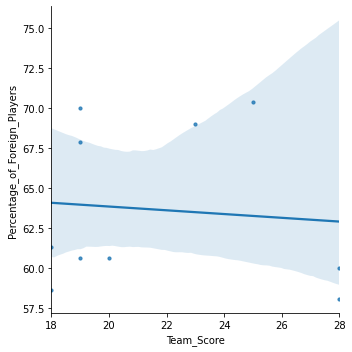

In [18]:
sns.lmplot('Team_Score'
           ,'Percentage_of_Foreign_Players'
           ,data=df_players_with_percentage
           ,fit_reg=True
           ,scatter_kws={"marker": "D"
                        ,"s": 10}
          )

It looks like all the dots spread irregularly on the plot and they are far away from the best fit line.

This is a **weak negative** correlation and did not prove that if the percentage of the foreign players in Manchester United decreases, team score increases.

I have doublechecked it by using the *corr()* function to get the correlation value. I have seen that it is below zero and so close to zero at the same time, which is a typical sign for a weak negative correlation.

In [19]:
df_players_with_percentage.Percentage_of_Foreign_Players.corr(df_players_with_percentage.Team_Score)

-0.093838775262962

This plot did not give me any clear indication, therefore, I have continued with the second one...

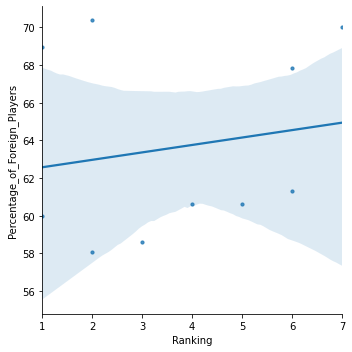

In [20]:
sns.lmplot('Ranking'
           ,'Percentage_of_Foreign_Players'
           ,data=df_players_with_percentage
           ,fit_reg=True
           ,scatter_kws={"marker": "D"
                        ,"s": 10}
          )

Same scenerio again.. All the dots spread irregularly on the plot and they are far away from the best fit line.


It is quite obvious that there is a **weak positive** correlation between the percentage of foreign players in Manchester United and the team ranking at the end of the season among other teams. 

I have doublechecked it by using the *corr()* function to get the correlation value also for this case and observed that it is just above 0.1, which proved again that there is not a visible correlation between these 2 attributes.

In [21]:
df_players_with_percentage.Percentage_of_Foreign_Players.corr(df_players_with_percentage.Ranking)

0.17488241635449112

### 3.2. Comparison of the Percentage of Goals Scored by Foreign and English Players

In this section, I have collected the goals scored by the foreign players and English players separately and calculated the percentage of goals for each side to see if the foreign players contributed to Manchester United positively.

Before starting the main part of the analysis, I wanted to see how the top scorers from the past 10 seasons along with their nationalities look like.. 

I have used the player statistics data frame to fetch player names and their nationalities, and then merged it with the team statistics data frame to show how many times the players from each nationality became a top scorer.

In [22]:
#Because only one player name for 10 seasons is sufficient for a merge, duplicate playernames removed from the player 
#statistics dataframe here..
df_all_seasons_mUtd_player_clean_copy = (df_all_seasons_mUtd_player_clean[['Player', 'Nation']]
                                       .drop_duplicates()
                                       .reset_index() 
                                       )

#Name of the column changed to "Player" before merging..  
df_all_seasons_mUtd_stats_clean_copy = df_all_seasons_mUtd_stats_clean.rename(columns = {'Top_Scorer':'Player'})

#Dataframes merged here..
df_top_players  = (pd.merge (df_all_seasons_mUtd_stats_clean_copy,df_all_seasons_mUtd_player_clean_copy, on='Player' )
                  [['Player','Nation']]
                  )

#Grouped by "Nation" value to see how many times a player from a different nationality became a top scorer..
df_top_players_count = (df_top_players.groupby('Nation')
                                        .count()
                                        .rename(columns = {'Player':'Player_Count'})
                        )
df_top_players_count


,Player_Count
Nation,
BEL,1
BUL,1
ENG,3
FRA,2
NED,1
SWE,1


It looks like the top scorers for Manchester United in the last 10 seasons are mostly from the outside of England. 

At first glance, this already looks like a positive contribution to Manchester United. However, before seeing the overall picture on the team level, it is not sufficient to generalize this insight. As a first step, the goals from both foreign players and English players calculated in the following cell.

In [23]:
#Goals from English players collected..
df_goals_English = df_all_seasons_mUtd_player_clean.loc[df_all_seasons_mUtd_player_clean.Nation==ENGLAND]

df_goals_English = (df_goals_English.groupby('Season')
                                    .sum()[['Goals']]
                   )

#Goals from foreign players collected..
df_goals_Others = df_all_seasons_mUtd_player_clean.loc[~(df_all_seasons_mUtd_player_clean.Nation==ENGLAND)]


df_goals_Others = (df_goals_Others.groupby('Season')
                                  .sum()[['Goals']]
                  )

#Renaming the 'Goals' columns before merging to make them more east-to-understand.
df_goals_English= df_goals_English.rename(columns={'Goals': 'Goals_English'})
df_goals_Others = df_goals_Others.rename(columns={'Goals': 'Goals_Others'})


#Now merging 2 dataframes above based on index, which is 'Season'..
df_goals_all_nations = pd.merge(df_goals_English, df_goals_Others, left_index=True, right_index=True)


df_goals_all_nations


,Goals_English,Goals_Others
Season,,
2010-2011,14.0,61.0
2011-2012,50.0,37.0
2012-2013,19.0,61.0
2013-2014,34.0,29.0
2014-2015,20.0,40.0
2015-2016,18.0,28.0
2016-2017,13.0,41.0
2017-2018,21.0,46.0
2018-2019,18.0,47.0


I preferred to work with the percentages instead of the goals as numbers, therefore, I have calculated the percentage of goals scored by the foreign players and English players by using the function I have created before.

In [24]:
#finding out percentage of each one..
df_goals_all_nations_goal_perc = percentage_data(df_goals_all_nations
                                       ,df_goals_all_nations.Goals_English
                                       , (df_goals_all_nations.Goals_English 
                                          + df_goals_all_nations.Goals_Others)
                                       ,'Percentage_of_Goals_English'
                                      ) 
 
df_goals_all_nations_goal_perc = percentage_data(df_goals_all_nations
                                      ,df_goals_all_nations.Goals_Others
                                      ,(df_goals_all_nations.Goals_English 
                                        + df_goals_all_nations.Goals_Others)
                                      ,'Percentage_of_Goals_Others')


#fetching only the percentage values since the goal values are not needed anymore..
df_goals_all_nations_goal_perc = df_goals_all_nations_goal_perc [['Percentage_of_Goals_English', 
                                                                  'Percentage_of_Goals_Others']]


df_goals_all_nations_goal_perc

,Percentage_of_Goals_English,Percentage_of_Goals_Others
Season,,
2010-2011,18.67,81.33
2011-2012,57.47,42.53
2012-2013,23.75,76.25
2013-2014,53.97,46.03
2014-2015,33.33,66.67
2015-2016,39.13,60.87
2016-2017,24.07,75.93
2017-2018,31.34,68.66
2018-2019,27.69,72.31


I have used a bar plot below to see the increase/decrease of the percentages for each side seperately and clearly.

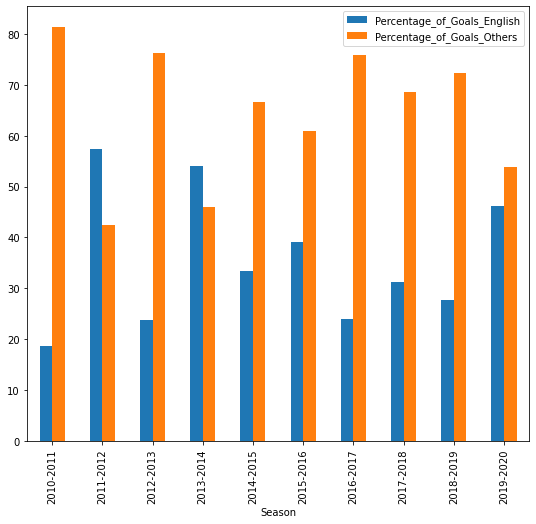

In [25]:
df_goals_all_nations_goal_perc.plot(kind='bar', figsize=(9,8))

This graph shows that based on the data that I have used, except for Seasons 2011-2012 and 2013-2014, the goals are mostly scored by the foreign players and they contributed a lot to the team success in terms of the total team score achieved at the end of a season.

With that being said, there are some caveats:

- The players' positions on the pitch have not been taken into consideration. If the goals were scored mostly by the foreign players due to the fact that they were positioned so close to the opposite team's goalkeepers in matches (forwards), then it would impact the conclusion of the analysis.
- The players' minutes which they spent in matches is also an important indicator because there might be a reason that since the percentage of time which the foreign players' spent on a pitch during every single match was high, the number of the goals which they scored might have been also high as a result.

## 4. Conclusions

As it has been already stated above, team score and high ranking on a scoreboard at the end of a season are quite important indicators for a team to measure their success. By taking the percentage value of the foreign players in Manchester United per season and correlating this with the team score & ranking values separately did not convince me enough in terms of seeing whether the quantity of the foreign players does impact the team's success positively or negatively. Further work would be collecting data for more seasons, for example, 20 seasons, and checking if the correlation would still be weak or not. Additionally, the scope could be extended by having data not only for Manchester United but more teams to analyze, so the possibility of seeing a strong correlation might increase. Especially selecting teams having foreign players' majority less in the past and more in the latest years could be a good example to analyze the impact.

The percentage of the goals scored per season by the players has also been analyzed in Section 3.2 and it has been observed that most of the goals were scored by the foreign players in the past 10 seasons, which means that the foreign players positively contributed to Manchester United. However, as some caveats stated already, further work is needed to make this part more elaborative. By using players' positions and minutes which they spent on a pitch per season would be helpful to ensure that the foreign players scored a lot not only because they spent more time on a pitch than the English players, or since they were positioned to more 'forward' positions, they had more chance to score goals.

Considering all the further work mentioned above might exceed the scope of this coursework, no additional actions were taken.

## 5. References

- Storey, D. Football, place and migration: Foreign footballers in the FA Premier League. Geography 2011, 86–94. https://www.jstor.org/stable/41320340?seq=1#metadata_info_tab_contents
- Premier League 2020, Premier League Club Stats, viewed 18 December 2020, https://www.premierleague.com/stats/top/clubs/wins?se=-1 
- Seaborn 2020, An introduction to seaborn, viewed on 21 December 2020, https://seaborn.pydata.org/introduction.html?highlight=pandas 